## ML MARKETING BANCARIO

### Librerias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Para guardar modelos
import json
import pickle

# sklearn - Preprocesamiento
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder

# sklearn - División de datos y selección de características
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_classif, SelectKBest

# sklearn - Modelado y optimización
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# sklearn - Métricas
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
df = pd.read_csv("../data/raw/bank-marketing-campaign-data.csv", sep =';')


df.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [4]:
df.shape

(41188, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

> ### Observaciones:
>
> conclusiones:
>
> - Existen un total de 41188 filas y 21 columnas, entre las cuales encontramos el target, `y`.
> - Todas las variables contienen la misma cantidad de valores.
> - Los datos cuentan con 10 características numéricas y 11 características categóricas.

### Limpieza de datos: Eliminar duplicados


In [6]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
41183    False
41184    False
41185    False
41186    False
41187    False
Length: 41188, dtype: bool

> ### Conclusión:
>
> No se enccontraron duplicados

> Las variables que utilizare en el proceso predictivo son:
 >
 > , `age`, `job`, `marital`, `education`, `duration`, `pdays`, `month`, `campaign`, `previous`, `housing`, `contact`, `emp.var.rate`, `cons.price.idx`, `cons.conf.idx`, `nr.employed` y `loan`.
 
> Las variables que no utilizare son:
  >
  > `day_of_week`, `default`,  `poutcome`, y `euribor3m` 

> Variable objetivo:
  > `y`

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


### Observaciones

> - Distribución de la Variable Objetivo (y)
La variable target indica si el cliente suscribió un depósito a plazo. Se observa un desequilibrio significativo en las clases:
Aproximadamente el 89% de los clientes respondieron negativamente
>
Solo el 11% aceptó el producto de depósito
Este desbalance es crucial considerar para el modelado predictivo.

## Análisis de Variables Numéricas
> - Campañas de Marketing (campaign)
Rango: 1 a 56 contactos por cliente durante la campaña actual
>
Distribución concentrada: El 75% de los clientes fueron contactados 3 veces o menos
>
Valores atípicos: Algunos clientes recibieron hasta 56 contactos, posiblemente indicando estrategias de persistencia extremas
>
> - Días desde Último Contacto (pdays)
Valor 999: Representa clientes no contactados previamente o contactados hace mucho tiempo
>
Valor 0: Indica contactos muy recientes
>
> - Distribución bimodal: Concentración en extremos (0 y 999 días)
>
> - Duración de Llamadas (duration)
Mediana: 180 segundos (3 minutos)
>
Distribución asimétrica: Llamadas cortas predominan, con algunas conversaciones extensas
>
Rango amplio: Desde 0 segundos hasta más de 80 minutos
>
## Datos Demográficos y Económicos
> - Edad de Clientes (age)
Rango: 17 a 98 años, mostrando cobertura de múltiples generaciones
>
> - Distribución: Concentración en adultos jóvenes y mediana edad (25-50 años)
>
Media: 40 años, indicando población objetivo madura
>
Indicadores Económicos
> - Tasa de Variación de Empleo (emp.var.rate):
>
Rango: -3.4 a 1.4
>
> - Variabilidad: Refleja diferentes condiciones económicas durante el periodo de estudio
>
> - Índice de Precios al Consumidor (cons.price.idx):
>
Rango estrecho: 92.201 a 94.767
>
Estabilidad relativa: Indica periodo de inflación controlada
>
> - Contactos Previos (previous)
75% de clientes: 0 contactos en campañas anteriores
>
Máximo: 7 contactos previos
>
Oportunidad: Gran parte de la base no ha sido contactada antes
>
Implicaciones para la Estrategia de Marketing
Eficiencia de Campañas
La mayoría de conversiones ocurren en los primeros contactos
>
Contactos excesivos pueden indicar ineficiencia en la selección inicial
>
Oportunidades de Segmentación
Clientes no contactados previamente (pdays = 999) representan oportunidad virgen
>
Duración de llamadas sugiere diferentes niveles de engagement
>
Consideraciones del Entorno Económico
Datos capturados durante variados escenarios económicos
>
Permite analizar sensibilidad del producto a condiciones macroeconómicas
>
Este análisis inicial proporciona una base sólida para desarrollar estrategias de targeting más efectivas y construir modelos predictivos robustos.

### Elimino las variables que no usare

In [8]:
df.drop(['day_of_week', 'default', 'poutcome', 'euribor3m'], axis=1, inplace=True)

df

,age,job,marital,education,housing,loan,contact,month,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,telephone,may,261,1,999,0,1.1,93.994,-36.4,5191.0,no
1,57,services,married,high.school,no,no,telephone,may,149,1,999,0,1.1,93.994,-36.4,5191.0,no
2,37,services,married,high.school,yes,no,telephone,may,226,1,999,0,1.1,93.994,-36.4,5191.0,no
3,40,admin.,married,basic.6y,no,no,telephone,may,151,1,999,0,1.1,93.994,-36.4,5191.0,no
4,56,services,married,high.school,no,yes,telephone,may,307,1,999,0,1.1,93.994,-36.4,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,yes,no,cellular,nov,334,1,999,0,-1.1,94.767,-50.8,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,cellular,nov,383,1,999,0,-1.1,94.767,-50.8,4963.6,no
41185,56,retired,married,university.degree,yes,no,cellular,nov,189,2,999,0,-1.1,94.767,-50.8,4963.6,no
41186,44,technician,married,professional.course,no,no,cellular,nov,442,1,999,0,-1.1,94.767,-50.8,4963.6,yes


## Eliminacion de duplicados

In [9]:
df.drop_duplicates(inplace=True)

df = df.drop_duplicates()

df

,age,job,marital,education,housing,loan,contact,month,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,telephone,may,261,1,999,0,1.1,93.994,-36.4,5191.0,no
1,57,services,married,high.school,no,no,telephone,may,149,1,999,0,1.1,93.994,-36.4,5191.0,no
2,37,services,married,high.school,yes,no,telephone,may,226,1,999,0,1.1,93.994,-36.4,5191.0,no
3,40,admin.,married,basic.6y,no,no,telephone,may,151,1,999,0,1.1,93.994,-36.4,5191.0,no
4,56,services,married,high.school,no,yes,telephone,may,307,1,999,0,1.1,93.994,-36.4,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,yes,no,cellular,nov,334,1,999,0,-1.1,94.767,-50.8,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,cellular,nov,383,1,999,0,-1.1,94.767,-50.8,4963.6,no
41185,56,retired,married,university.degree,yes,no,cellular,nov,189,2,999,0,-1.1,94.767,-50.8,4963.6,no
41186,44,technician,married,professional.course,no,no,cellular,nov,442,1,999,0,-1.1,94.767,-50.8,4963.6,yes


##  Limpieza:
> - Antes de la limpieza:
41,188 registros
21 columnas (variables)
>
> - Después de la limpieza:
41,150 registros
17 columnas (variables)

In [10]:
duplicados_eliminados = 41188 - 41150

f'Los duplicados eliminados son: {duplicados_eliminados}' 

'Los duplicados eliminados son: 38'

In [11]:
variables_eliminadas = 21 - 17

f'Los variables eliminadas son: {variables_eliminadas}' 

'Los variables eliminadas son: 4'

## Observacion 2
>
> - Paso la variable `y` a binario. 1 a si y 0 a no

In [12]:
df['y'] = df['y'].map({'yes': 1, 'no': 0}) # Convierto la variable y original a binario (1 = yes, 0 = no)

df

,age,job,marital,education,housing,loan,contact,month,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,telephone,may,261,1,999,0,1.1,93.994,-36.4,5191.0,0
1,57,services,married,high.school,no,no,telephone,may,149,1,999,0,1.1,93.994,-36.4,5191.0,0
2,37,services,married,high.school,yes,no,telephone,may,226,1,999,0,1.1,93.994,-36.4,5191.0,0
3,40,admin.,married,basic.6y,no,no,telephone,may,151,1,999,0,1.1,93.994,-36.4,5191.0,0
4,56,services,married,high.school,no,yes,telephone,may,307,1,999,0,1.1,93.994,-36.4,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,yes,no,cellular,nov,334,1,999,0,-1.1,94.767,-50.8,4963.6,1
41184,46,blue-collar,married,professional.course,no,no,cellular,nov,383,1,999,0,-1.1,94.767,-50.8,4963.6,0
41185,56,retired,married,university.degree,yes,no,cellular,nov,189,2,999,0,-1.1,94.767,-50.8,4963.6,0
41186,44,technician,married,professional.course,no,no,cellular,nov,442,1,999,0,-1.1,94.767,-50.8,4963.6,1


Variables categoricas:  

Variables numericas 

## Análisis de Variables

### Análisis de Variables Univariante Numéricas

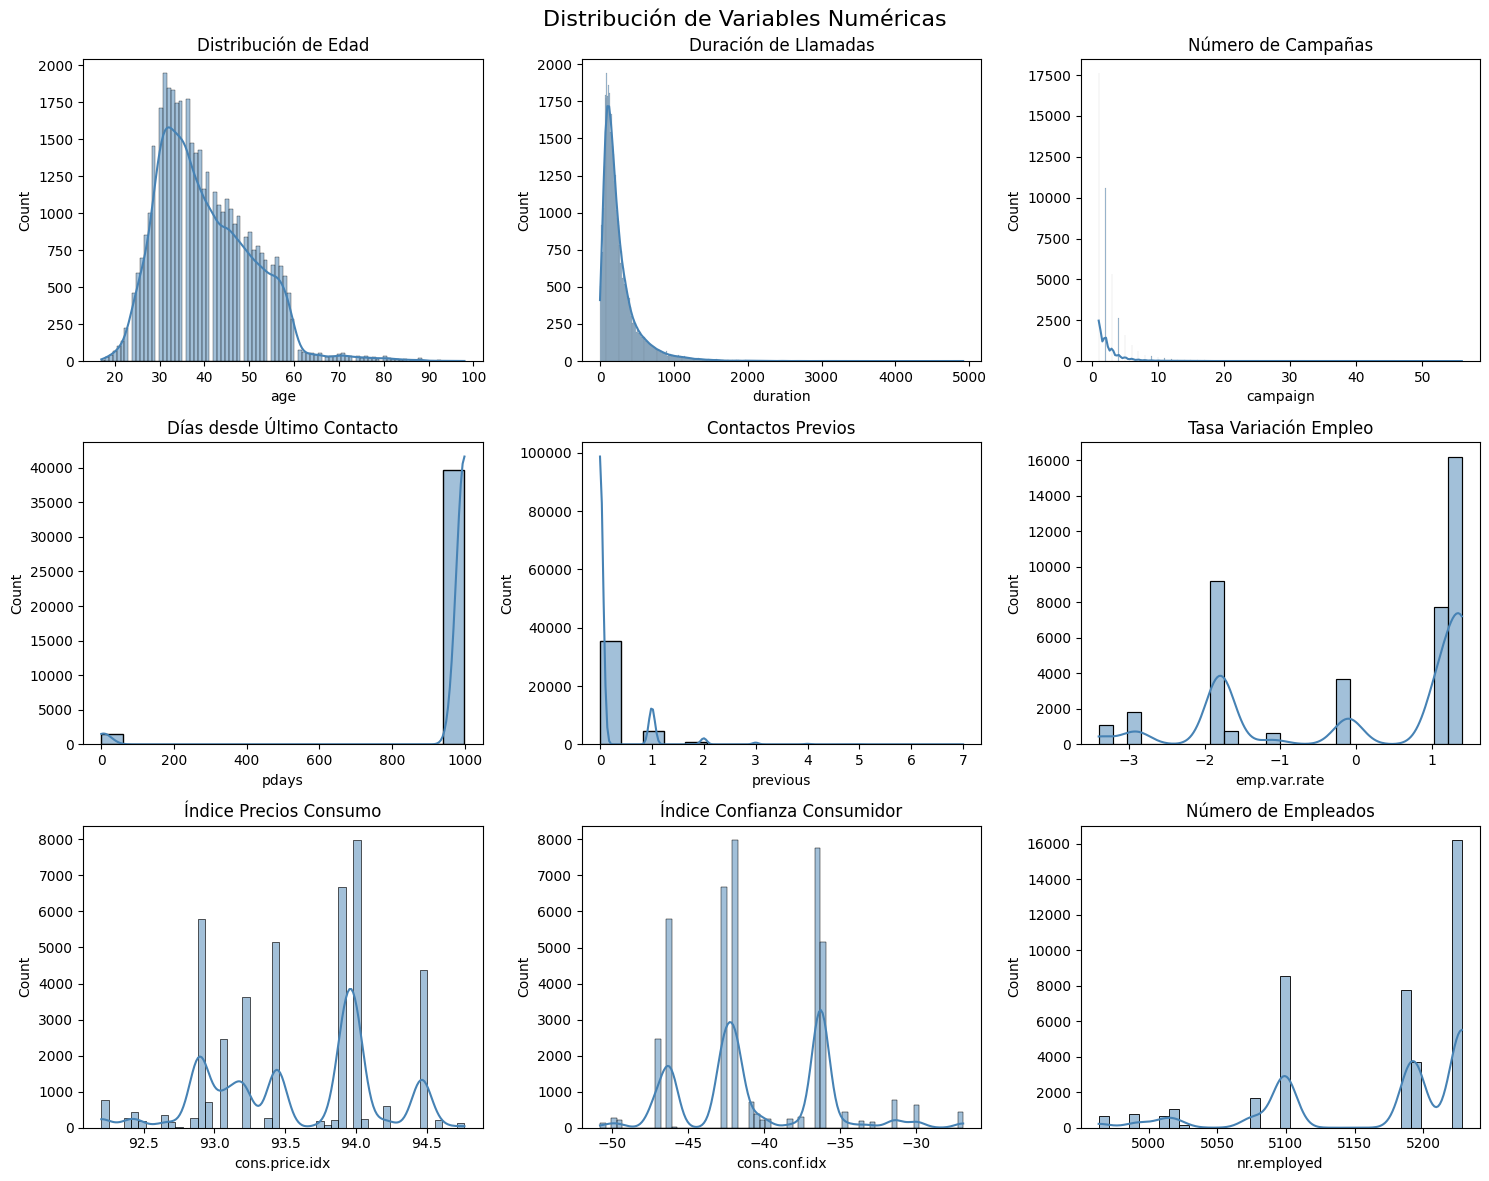

In [13]:

fig, axes = plt.subplots(3, 3, figsize=(15, 12))


sns.histplot(ax=axes[0, 0], data=df, x="age", kde=True, color='steelblue')
axes[0, 0].set_title("Distribución de Edad")
sns.histplot(ax=axes[0, 1], data=df, x="duration", kde=True, color='steelblue') 
axes[0, 1].set_title("Duración de Llamadas")
sns.histplot(ax=axes[0, 2], data=df, x="campaign", kde=True, color='steelblue')
axes[0, 2].set_title("Número de Campañas")
sns.histplot(ax=axes[1, 0], data=df, x="pdays", kde=True, color='steelblue')
axes[1, 0].set_title("Días desde Último Contacto")
sns.histplot(ax=axes[1, 1], data=df, x="previous", kde=True, color='steelblue')
axes[1, 1].set_title("Contactos Previos")
sns.histplot(ax=axes[1, 2], data=df, x="emp.var.rate", kde=True, color='steelblue')
axes[1, 2].set_title("Tasa Variación Empleo")
sns.histplot(ax=axes[2, 0], data=df, x="cons.price.idx", kde=True, color='steelblue')
axes[2, 0].set_title("Índice Precios Consumo")
sns.histplot(ax=axes[2, 1], data=df, x="cons.conf.idx", kde=True, color='steelblue')
axes[2, 1].set_title("Índice Confianza Consumidor")
sns.histplot(ax=axes[2, 2], data=df, x="nr.employed", kde=True, color='steelblue')
axes[2, 2].set_title("Número de Empleados")


fig.suptitle("Distribución de Variables Numéricas", fontsize=16, y=0.98)
plt.tight_layout()
plt.show()

## Observaciones

> - **age (Edad):**
La mayoría de los clientes tienen entre 30 y 40 años.
Hay pocos clientes muy jóvenes (menos de 20) y muy mayores (más de 60)
>
> - **pdays (Días desde último contacto):**
La gran mayoría de clientes (casi 40,000) nunca habían sido contactados antes (valor 999).
Muy pocos clientes habían sido contactados previamente (valores mayores a 0).
>
> - **duration (Duración de llamadas):**
La mayoría de las llamadas son cortas, menores a 5 minutos.
Existen llamadas muy extensas que superan los 30 minutos, pero son casos atípicos.
La distribución está muy sesgada hacia la izquierda.
>
> - **campaign (Número de campañas):**
La gran mayoría de clientes fueron contactados menos de 10 veces.
Hay muy pocos casos con más de 20 contactos, lo que podría indicar persistencia excesiva.
>
> - **previous (Contactos previos):**
La inmensa mayoría de clientes (más de 35,000) no tenían contactos previos.
Muy pocos clientes tenían más de 2 contactos anteriores.
>
> - **emp.var.rate (Tasa de variación de empleo):**
La tasa muestra valores muy concentrados en puntos específicos (-1.8, 1.1, 1.4).
Indica que los datos provienen de periodos económicos distintos.
>
> - **cons.price.idx (Índice de Precios al Consumidor):**
Los precios se concentran en dos valores principales: alrededor de 93.2 y 94.0.
Hay poca variación en los precios durante el periodo estudiado.
>
> - **cons.conf.idx (Confianza del Consumidor):**
La confianza de los consumidores es mayoritariamente baja (valores negativos).
El valor más común está alrededor de -40, indicando pesimismo general.
Existen varios picos específicos en la distribución.
>
> - **nr.employed (Número de empleados):**
El número de empleados se concentra en valores específicos alrededor de 5000-5200.
Muestra varios picos marcados, similar a otros indicadores económicos.
La distribución no es normal, con valores muy concentrados.

## Analisis de variables univariantes categoricas

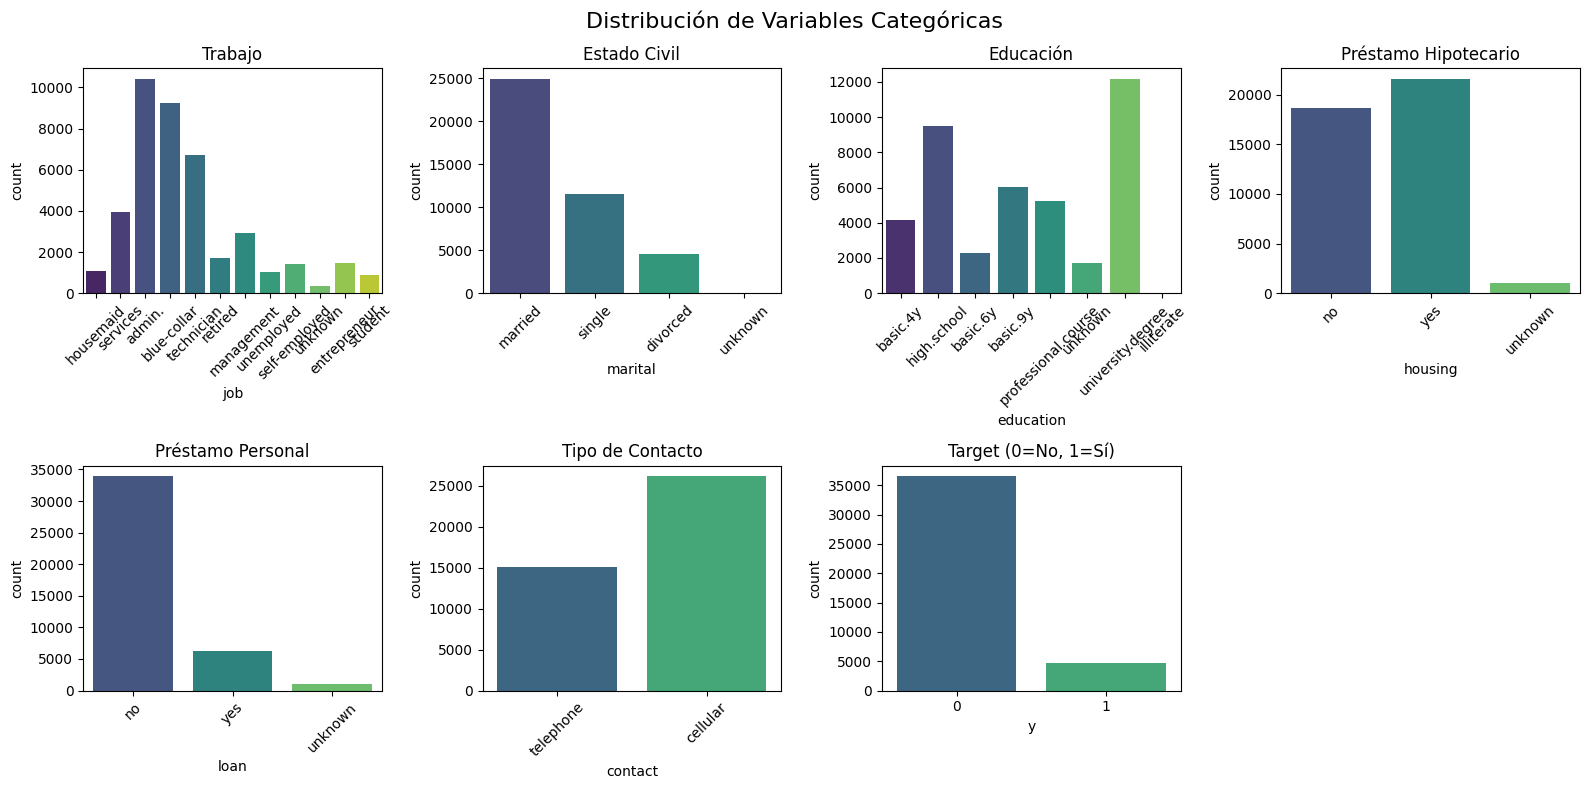

In [14]:
fig, axes = plt.subplots(2, 4, figsize=(16, 8))

sns.countplot(ax=axes[0, 0], data=df, x='job', hue='job', palette='viridis', legend=False)
axes[0, 0].set_title('Trabajo')
axes[0, 0].tick_params(axis='x', rotation=45)
sns.countplot(ax=axes[0, 1], data=df, x='marital', hue='marital', palette='viridis', legend=False)
axes[0, 1].set_title('Estado Civil')
axes[0, 1].tick_params(axis='x', rotation=45)
sns.countplot(ax=axes[0, 2], data=df, x='education', hue='education', palette='viridis', legend=False)
axes[0, 2].set_title('Educación')
axes[0, 2].tick_params(axis='x', rotation=45)
sns.countplot(ax=axes[0, 3], data=df, x='housing', hue='housing', palette='viridis', legend=False)
axes[0, 3].set_title('Préstamo Hipotecario')
axes[0, 3].tick_params(axis='x', rotation=45)
sns.countplot(ax=axes[1, 0], data=df, x='loan', hue='loan', palette='viridis', legend=False)
axes[1, 0].set_title('Préstamo Personal')
axes[1, 0].tick_params(axis='x', rotation=45)
sns.countplot(ax=axes[1, 1], data=df, x='contact', hue='contact', palette='viridis', legend=False)
axes[1, 1].set_title('Tipo de Contacto')
axes[1, 1].tick_params(axis='x', rotation=45)
sns.countplot(ax=axes[1, 2], data=df, x='y', hue='y', palette='viridis', legend=False)
axes[1, 2].set_title('Target (0=No, 1=Sí)')
axes[1, 2].tick_params(axis='x', rotation=0)  # Sin rotación para y

axes[1, 3].set_visible(False)

fig.suptitle('Distribución de Variables Categóricas', fontsize=16, y=0.98)
plt.tight_layout()
plt.show()

## Observaciones

> - **job (Trabajo):**
La mayoría de los clientes son trabajadores administrativos.
>
> - **marital (Estado civil):**
La mayoría de los clientes están casados.
Hay menos clientes solteros y muy pocos divorciados.
>
> - **education (Educación):**
La mayoría de los clientes tienen educación universitaria.
Hay clientes con todos los niveles educativos, pero la universidad es el más común.
>
> - **default (Incumplimiento de pagos):**
La gran mayoría de clientes NO tiene deudas en incumplimiento.
Muy pocos clientes tienen problemas de pagos pendientes.
>
> - **loan (Préstamo personal):**
La mayoría de los clientes NO tiene préstamos personales.
Hay muchos menos clientes con préstamos personales activos.
>
> - **contact (Tipo de contacto):**
La mayoría de los contactos se hicieron por celular.
Muy pocos contactos se hicieron por teléfono fijo.
>
> - **y (Target - Depósito a plazo):**
La distribución de la variable objetivo muestra un desbalance significativo entre clases.
La gran mayoría de clientes (aproximadamente 35,000) no contrataron el depósito (valor 0).
Solo una pequeña proporción de clientes (aproximadamente 4,000-5,000) aceptaron el depósito (valor 1).
Este desbalance de clases es importante considerar para el modelado predictivo.

In [15]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,nr.employed,y
count,41150.000000,41150.000000,41150.000000,41150.000000,41150.000000,41150.000000,41150.000000,41150.000000,41150.000000,41150.000000
mean,40.025759,258.403086,2.568554,962.441725,0.173098,0.081431,93.575654,-40.504255,5167.015492,0.112734
std,10.422249,259.359862,2.770991,186.993894,0.495086,1.571055,0.578914,4.628139,72.263227,0.316271
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,4963.600000,0.000000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,5099.100000,0.000000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,5191.000000,0.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,5228.100000,0.000000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5228.100000,1.000000


##  Analisis Bivariante

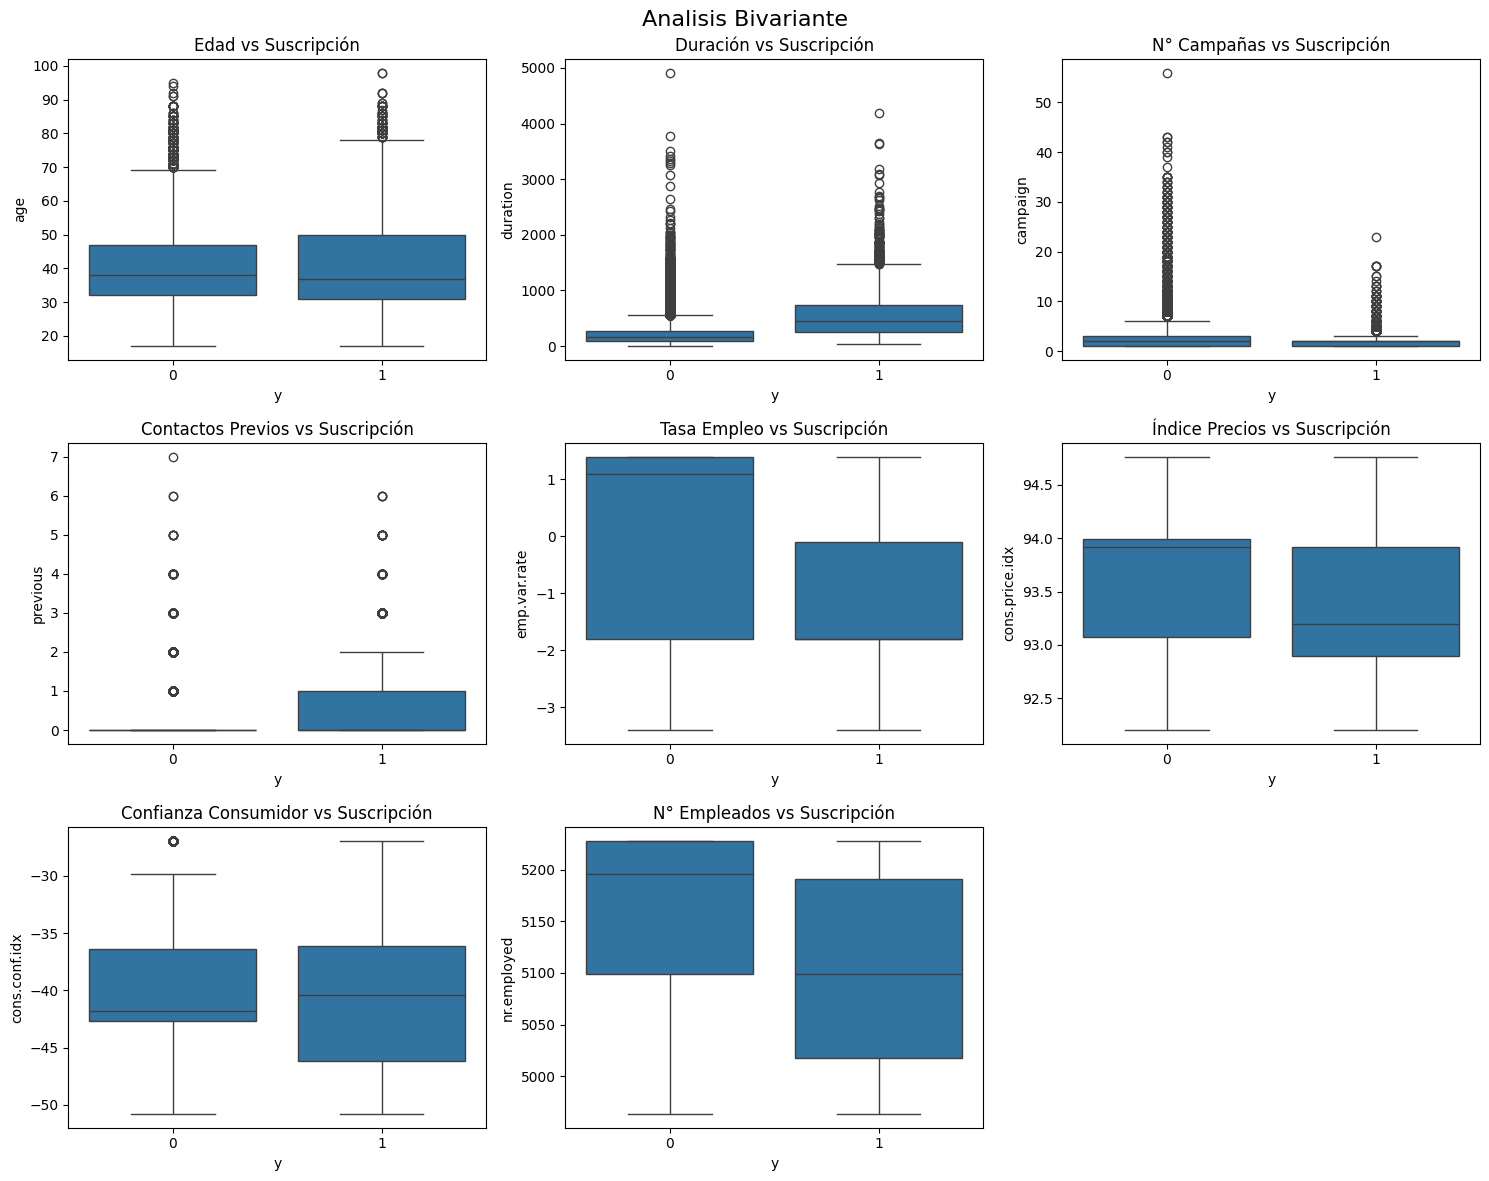

In [16]:
fig, axes = plt.subplots(3, 3, figsize=(15, 12))

sns.boxplot(ax=axes[0, 0], data=df, x='y', y='age')
axes[0, 0].set_title('Edad vs Suscripción')
sns.boxplot(ax=axes[0, 1], data=df, x='y', y='duration')
axes[0, 1].set_title('Duración vs Suscripción')
sns.boxplot(ax=axes[0, 2], data=df, x='y', y='campaign')
axes[0, 2].set_title('N° Campañas vs Suscripción')
sns.boxplot(ax=axes[1, 0], data=df, x='y', y='previous')
axes[1, 0].set_title('Contactos Previos vs Suscripción')
sns.boxplot(ax=axes[1, 1], data=df, x='y', y='emp.var.rate')
axes[1, 1].set_title('Tasa Empleo vs Suscripción')
sns.boxplot(ax=axes[1, 2], data=df, x='y', y='cons.price.idx')
axes[1, 2].set_title('Índice Precios vs Suscripción')
sns.boxplot(ax=axes[2, 0], data=df, x='y', y='cons.conf.idx')
axes[2, 0].set_title('Confianza Consumidor vs Suscripción')
sns.boxplot(ax=axes[2, 1], data=df, x='y', y='nr.employed')
axes[2, 1].set_title('N° Empleados vs Suscripción')

axes[2, 2].set_visible(False)

fig.suptitle('Analisis Bivariante', fontsize=16, y=0.98)
plt.tight_layout()
plt.show()

## Observaciones del Análisis Bivariante

> - age (Edad) vs y:
Los clientes que contrataron el depósito tienden a ser ligeramente mayores.
No hay una diferencia muy marcada en la distribución de edades entre ambos grupos.
>
> - duration (Duración) vs y:
Existe una diferencia muy significativa en la duración de las llamadas.
Las llamadas que resultaron en contratación fueron considerablemente más largas.
Esto sugiere que clientes interesados dedican más tiempo a la conversación.
> 
> - campaign (Número de campañas) vs y:
Los clientes que contrataron fueron contactados menos veces en promedio.
Muchos contactos repetidos pueden indicar menor probabilidad de conversión.
> 
> - previous (Contactos previos) vs y:
Los clientes con más contactos previos tienen mayor probabilidad de contratar.
Esto indica que la persistencia en campañas anteriores puede dar resultados.
>
> - emp.var.rate (Tasa de empleo) vs y:
Existen diferencias en las condiciones económicas entre ambos grupos.
Los clientes que contrataron estuvieron expuestos a diferentes escenarios de empleo.
>
> - cons.price.idx (Índice de precios) vs y:
Se observan diferencias en el contexto inflacionario entre los grupos.
El entorno de precios influye en la decisión de contratar depósitos.
>
> - cons.conf.idx (Confianza del consumidor) vs y:
La confianza del consumidor muestra patrones distintos entre grupos.
Clientes que contrataron experimentaron diferentes niveles de confianza económica.
>
> - nr.employed (Número de empleados) vs y:
Existen diferencias en las condiciones del mercado laboral entre grupos.
El nivel de empleo parece influir en la disposición a contratar depósitos.

## Análisis bivariante de correlación - Variables categóricas vs target

**Preparo los datos para análisis de correlación**

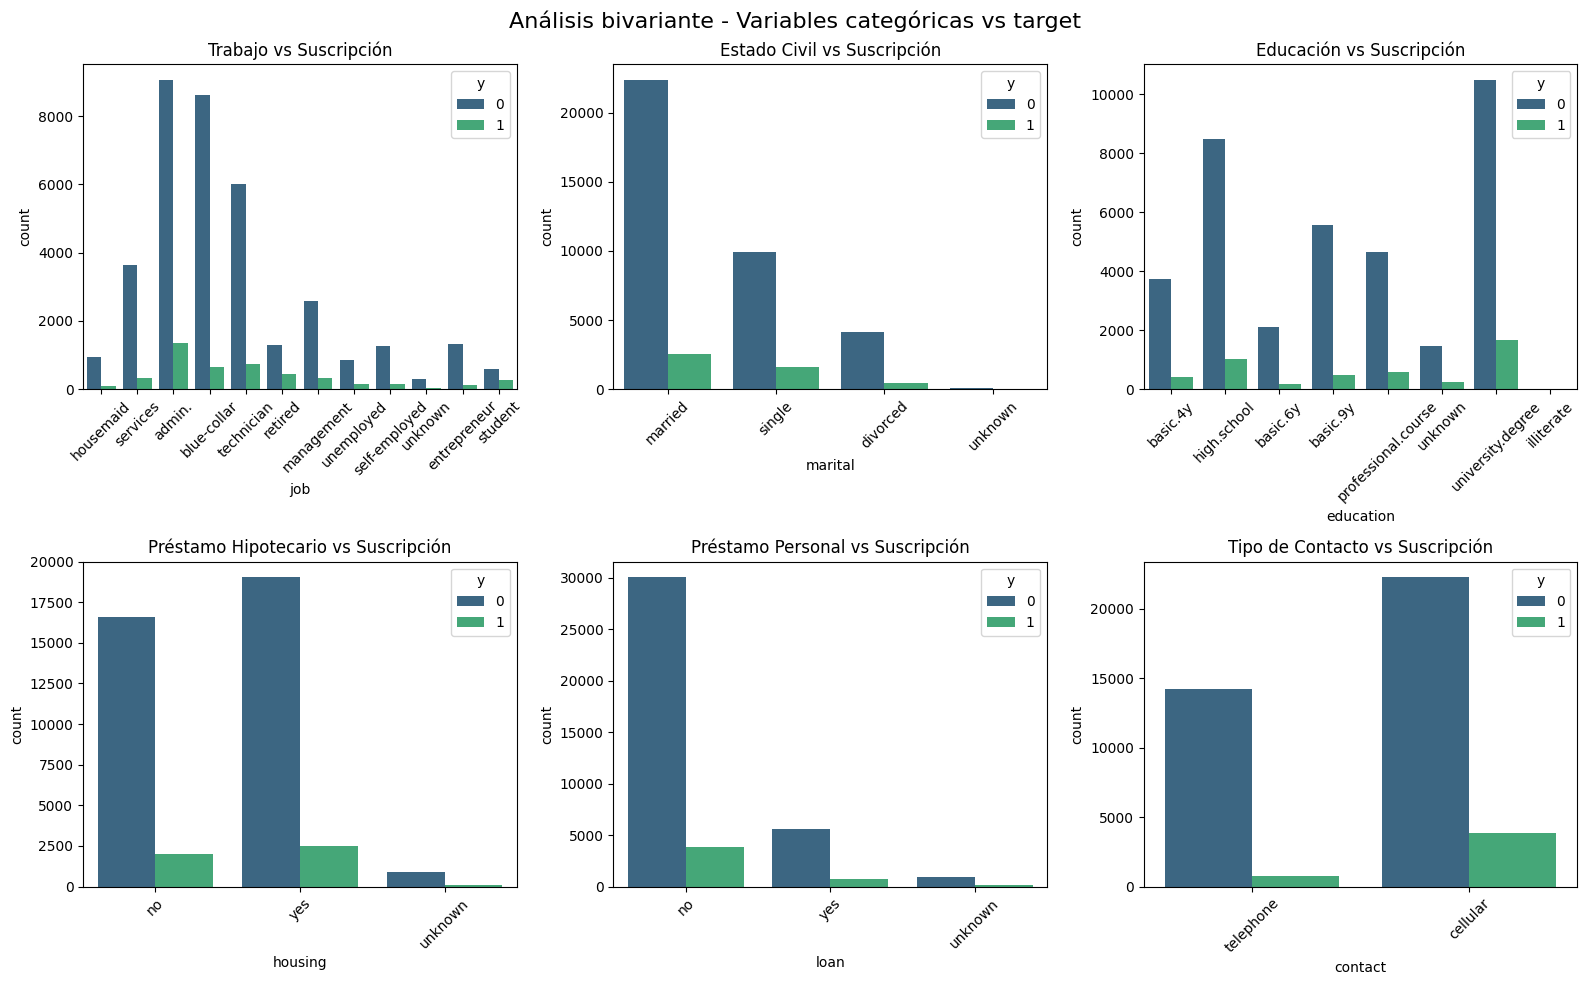

In [17]:
fig, axes = plt.subplots(2, 3, figsize=(16, 10))

sns.countplot(ax=axes[0, 0], data=df, x='job', hue='y', palette='viridis')
axes[0, 0].set_title('Trabajo vs Suscripción')
axes[0, 0].tick_params(axis='x', rotation=45)
sns.countplot(ax=axes[0, 1], data=df, x='marital', hue='y', palette='viridis')
axes[0, 1].set_title('Estado Civil vs Suscripción')
axes[0, 1].tick_params(axis='x', rotation=45)
sns.countplot(ax=axes[0, 2], data=df, x='education', hue='y', palette='viridis')
axes[0, 2].set_title('Educación vs Suscripción')
axes[0, 2].tick_params(axis='x', rotation=45)
sns.countplot(ax=axes[1, 0], data=df, x='housing', hue='y', palette='viridis')
axes[1, 0].set_title('Préstamo Hipotecario vs Suscripción')
axes[1, 0].tick_params(axis='x', rotation=45)
sns.countplot(ax=axes[1, 1], data=df, x='loan', hue='y', palette='viridis')
axes[1, 1].set_title('Préstamo Personal vs Suscripción')
axes[1, 1].tick_params(axis='x', rotation=45)
sns.countplot(ax=axes[1, 2], data=df, x='contact', hue='y', palette='viridis')
axes[1, 2].set_title('Tipo de Contacto vs Suscripción')
axes[1, 2].tick_params(axis='x', rotation=45)


fig.suptitle('Análisis bivariante - Variables categóricas vs target', fontsize=16, y=0.98)
plt.tight_layout()
plt.show()

¡Perfecto! Una vez ejecutado el análisis bivariante de variables categóricas, aquí están las observaciones en tu estilo:

## Observaciones del Análisis Bivariante Categórico

> - **job (Trabajo) vs y:**
Existen diferencias significativas en las tasas de conversión por tipo de trabajo.
Los estudiantes y jubilados muestran mayores proporciones de aceptación.
Los trabajadores de blue-collar y servicios tienen menores tasas de conversión.
>
> - **marital (Estado Civil) vs y:**
Los clientes solteros muestran una mayor propensión a contratar el depósito.
Los clientes casados tienen una tasa de conversión más baja en comparación.
El estado civil parece influir en la decisión de inversión.
>
> - **education (Educación) vs y:**
El nivel educativo muestra patrones diferenciados en la aceptación.
Clientes con educación universitaria y los analfabetos tienen mayores tasas.
Los niveles educativos básicos presentan menores proporciones de aceptación.
>
> - **housing (Préstamo Hipotecario) vs y:**
La tenencia de préstamo hipotecario influye en la decisión de contratar.
Clientes sin préstamo hipotecario muestran mayor disposición al depósito.
Existen diferencias notables entre los grupos con y sin hipoteca.
>
> - **loan (Préstamo Personal) vs y:**
Los clientes sin préstamos personales tienen mayor probabilidad de aceptar.
La carga de deuda personal parece afectar negativamente la capacidad de ahorro.
Existe una clara diferencia entre clientes con y sin préstamos personales.
>
> - **contact (Tipo de Contacto) vs y:**
El método de contacto influye significativamente en la tasa de conversión.
Un tipo de contacto muestra mayor efectividad que el otro.
La canal de comunicación es un factor importante en el éxito de la campaña.


### Creo columnas numéricas para las variables categóricas

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41150 entries, 0 to 41187
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41150 non-null  int64  
 1   job             41150 non-null  object 
 2   marital         41150 non-null  object 
 3   education       41150 non-null  object 
 4   housing         41150 non-null  object 
 5   loan            41150 non-null  object 
 6   contact         41150 non-null  object 
 7   month           41150 non-null  object 
 8   duration        41150 non-null  int64  
 9   campaign        41150 non-null  int64  
 10  pdays           41150 non-null  int64  
 11  previous        41150 non-null  int64  
 12  emp.var.rate    41150 non-null  float64
 13  cons.price.idx  41150 non-null  float64
 14  cons.conf.idx   41150 non-null  float64
 15  nr.employed     41150 non-null  float64
 16  y               41150 non-null  int64  
dtypes: float64(4), int64(6), object(7)
m

Factorizo las variebles categoricas a numericas

In [19]:
df['job'] = pd.factorize(df['job'])[0]
df['marital'] = pd.factorize(df['marital'])[0]
df['education'] = pd.factorize(df['education'])[0]
df['housing'] = pd.factorize(df['housing'])[0]
df['loan'] = pd.factorize(df['loan'])[0]
df['contact'] = pd.factorize(df['contact'])[0]



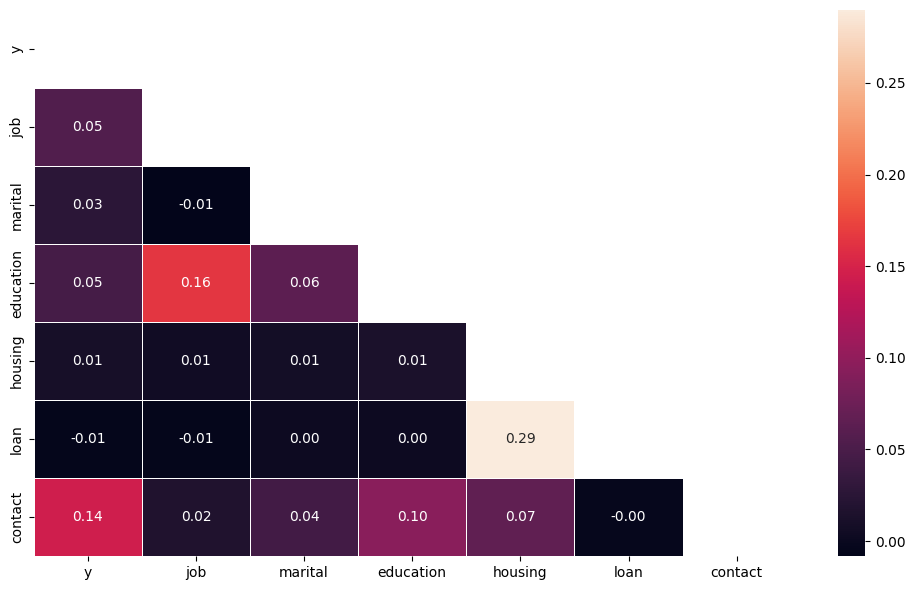

In [20]:
corr = df[['y', 'job', 'marital', 'education', 'housing', 'loan', 'contact']].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

fig, axis = plt.subplots(figsize=(10, 6))
sns.heatmap(corr, mask=mask, annot=True, linewidths=0.5, fmt=".2f")

plt.tight_layout()
plt.show()

## Observaciones
Las variables categóricas muestran correlaciones generalmente bajas con el target, siendo 'housing' y 'loan' las que tienen mayor influencia (aunque negativa).

#### Análisis numérico-categórico (completo)


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41150 entries, 0 to 41187
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41150 non-null  int64  
 1   job             41150 non-null  int64  
 2   marital         41150 non-null  int64  
 3   education       41150 non-null  int64  
 4   housing         41150 non-null  int64  
 5   loan            41150 non-null  int64  
 6   contact         41150 non-null  int64  
 7   month           41150 non-null  object 
 8   duration        41150 non-null  int64  
 9   campaign        41150 non-null  int64  
 10  pdays           41150 non-null  int64  
 11  previous        41150 non-null  int64  
 12  emp.var.rate    41150 non-null  float64
 13  cons.price.idx  41150 non-null  float64
 14  cons.conf.idx   41150 non-null  float64
 15  nr.employed     41150 non-null  float64
 16  y               41150 non-null  int64  
dtypes: float64(4), int64(12), object(1)


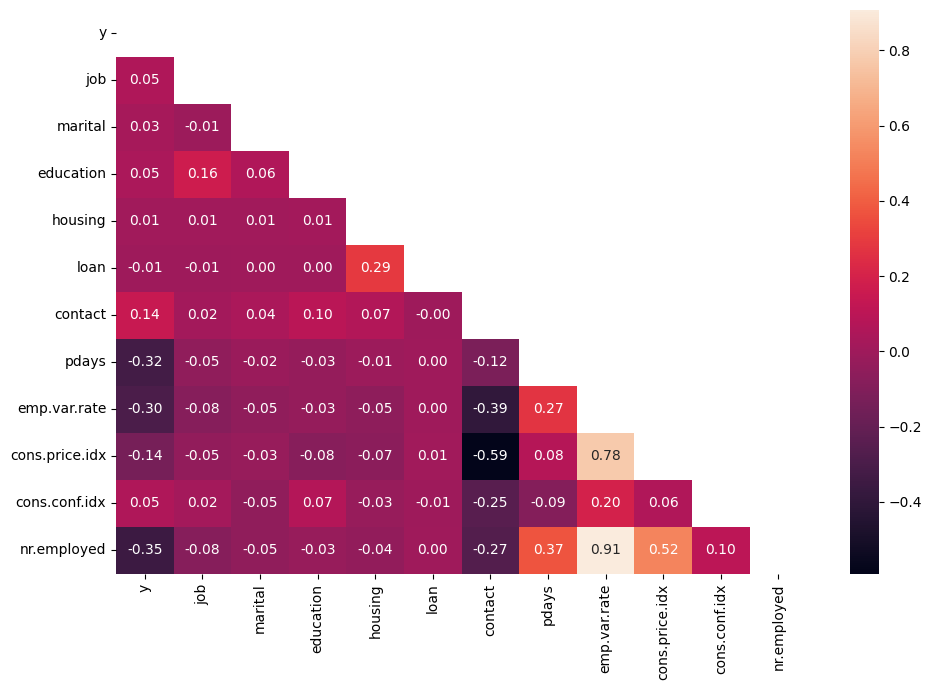

In [22]:
corr = df[['y', 'job', 'marital', 'education', 'housing', 'loan', 'contact', 'pdays', 'emp.var.rate', 'cons.price.idx','cons.conf.idx', 'nr.employed']].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

fig, axis = plt.subplots(figsize=(10, 7))
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f")

plt.tight_layout()
plt.show()

## Observaciones Corregidas de Correlación

> - **pdays vs y:**
Correlación moderada-alta (0.32) con el target
Clientes contactados más recientemente tienen mayor probabilidad de contratar
>
> - **nr.employed vs y:**
Correlación moderada-alta (0.35) con la variable objetivo
El número de empleados influye significativamente en la decisión
>
> - **emp.var.rate vs y:**
Correlación moderada (0.30) con el target
La tasa de variación del empleo afecta la propensión a contratar
>
> - **contact vs y:**
Correlación baja (0.14) con la variable objetivo
El tipo de contacto tiene influencia limitada en la decisión

Conclusión principal: Enfócarse en clientes contactados recientemente y monitorea indicadores económicos como tasa de empleo y número de empleados, ya que estos muestran mayor relación a invertir.



# Matriz de correlación solo con variables importantes

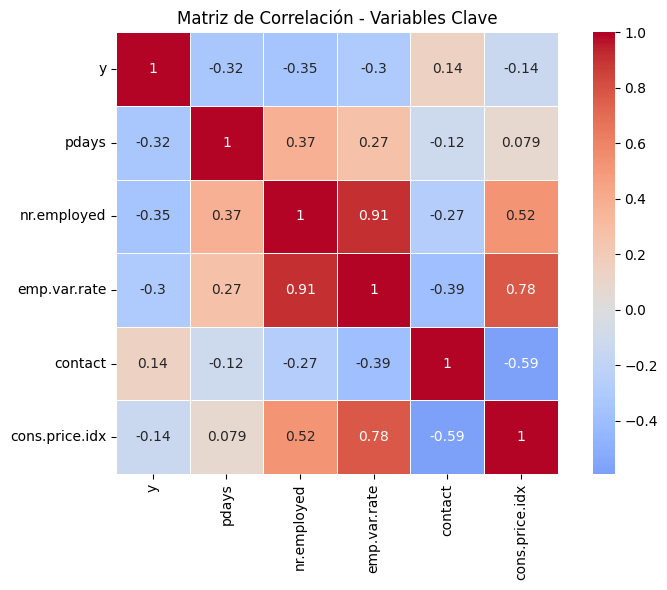

In [23]:
variables_importantes = ['y', 'pdays', 'nr.employed', 'emp.var.rate', 'contact', 'cons.price.idx']
corr_matrix = df[variables_importantes].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5)
plt.title('Matriz de Correlación - Variables Clave')
plt.tight_layout()
plt.show()

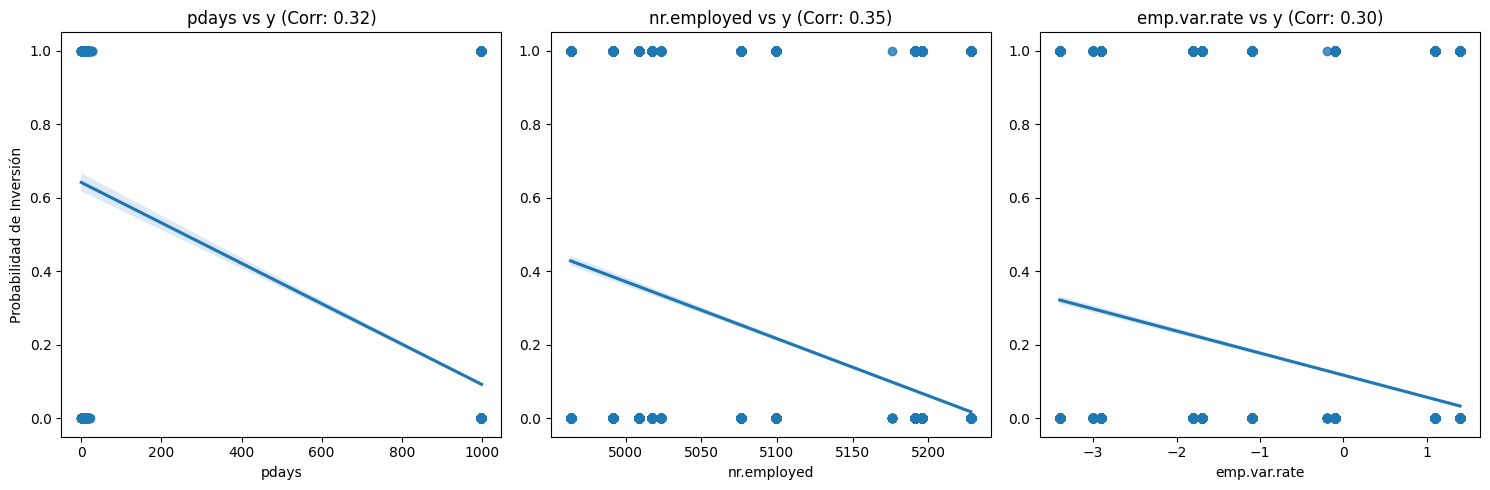

In [24]:
fig, axis = plt.subplots(figsize=(15, 5), ncols=3)

# Gráfico 1: pdays vs y (correlación: 0.32)
sns.regplot(ax=axis[0], data=df, x="pdays", y="y")
axis[0].set_title('pdays vs y (Corr: 0.32)')
axis[0].set_ylabel('Probabilidad de Inversión')

# Gráfico 2: nr.employed vs y (correlación: 0.35)
sns.regplot(ax=axis[1], data=df, x="nr.employed", y="y")
axis[1].set_title('nr.employed vs y (Corr: 0.35)')
axis[1].set_ylabel(None)

# Gráfico 3: emp.var.rate vs y (correlación: 0.30)
sns.regplot(ax=axis[2], data=df, x="emp.var.rate", y="y")
axis[2].set_title('emp.var.rate vs y (Corr: 0.30)')
axis[2].set_ylabel(None)

plt.tight_layout()
plt.show()

> - Enfocar esfuerzos en clientes contactados hace más de 50 días
> - Monitorear indicadores económicos (tasa de empleo) para timing de campañas
> - Priorizar contactos cuando el nr.employed esté en niveles altos

# Realizamos el split

In [25]:
X = df.drop('y', axis=1)
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [26]:
X_train

,age,job,marital,education,housing,loan,contact,month,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,nr.employed
19530,48,3,0,3,1,0,1,aug,122,1,999,0,1.4,93.444,-36.1,5228.1
6526,52,2,0,1,1,0,0,may,99,5,999,0,1.1,93.994,-36.4,5191.0
28091,39,3,0,2,0,0,1,apr,239,2,999,0,-1.8,93.075,-47.1,5099.1
32394,35,3,0,3,0,0,1,may,25,6,999,1,-1.8,92.893,-46.2,5099.1
7672,51,2,0,6,1,0,0,may,119,2,999,0,1.1,93.994,-36.4,5191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20320,32,2,2,6,1,0,1,aug,1080,3,999,0,1.4,93.444,-36.1,5228.1
20958,32,2,1,6,0,0,1,aug,59,2,999,0,1.4,93.444,-36.1,5228.1
28780,46,10,0,6,1,1,1,apr,285,5,999,0,-1.8,93.075,-47.1,5099.1
26857,33,2,0,6,2,2,1,nov,470,2,999,0,-0.1,93.200,-42.0,5195.8


In [27]:
X_train.columns

Index(['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact',
       'month', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'nr.employed'],
      dtype='object')

In [28]:
y_test.shape

(8230,)

In [29]:
X_train.head()

,age,job,marital,education,housing,loan,contact,month,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,nr.employed
19530,48,3,0,3,1,0,1,aug,122,1,999,0,1.4,93.444,-36.1,5228.1
6526,52,2,0,1,1,0,0,may,99,5,999,0,1.1,93.994,-36.4,5191.0
28091,39,3,0,2,0,0,1,apr,239,2,999,0,-1.8,93.075,-47.1,5099.1
32394,35,3,0,3,0,0,1,may,25,6,999,1,-1.8,92.893,-46.2,5099.1
7672,51,2,0,6,1,0,0,may,119,2,999,0,1.1,93.994,-36.4,5191.0


In [30]:
y_train

19530    0
6526     0
28091    0
32394    0
7672     0
        ..
20320    1
20958    0
28780    0
26857    0
31267    0
Name: y, Length: 32920, dtype: int64

In [31]:
y_test

29620    0
7307     0
22269    1
25751    0
16986    0
        ..
30010    0
519      0
35274    0
4562     0
27442    0
Name: y, Length: 8230, dtype: int64

## Escalado de variables

In [32]:
# Realizar el escalado con el dataset dividido
norm_scaler = StandardScaler()

# Solo variables numéricas (como en el ejemplo del Titanic)
num_variables = ['age', 'duration', 'campaign', 'pdays', 'previous', 
                 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'nr.employed']

norm_features_x_train = norm_scaler.fit_transform(X_train[num_variables])
norm_features_x_test = norm_scaler.transform(X_test[num_variables])

X_train_norm = pd.DataFrame(norm_features_x_train,
                       index=X_train.index,
                       columns=num_variables)

X_test_norm = pd.DataFrame(norm_features_x_test,
                      index=X_test.index,
                      columns=num_variables)

X_train_norm.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,nr.employed
19530,0.764546,-0.524679,-0.563339,0.194416,-0.349456,0.840252,-0.227535,0.953662,0.845488
6526,1.148449,-0.613449,0.872875,0.194416,-0.349456,0.649303,0.721623,0.888841,0.333116
28091,-0.099235,-0.073109,-0.204285,0.194416,-0.349456,-1.196530,-0.864334,-1.423132,-0.936077
32394,-0.483138,-0.899057,1.231928,0.194416,1.658939,-1.196530,-1.178419,-1.228667,-0.936077
7672,1.052473,-0.536258,-0.204285,0.194416,-0.349456,0.649303,0.721623,0.888841,0.333116


In [33]:
X_train_norm


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,nr.employed
19530,0.764546,-0.524679,-0.563339,0.194416,-0.349456,0.840252,-0.227535,0.953662,0.845488
6526,1.148449,-0.613449,0.872875,0.194416,-0.349456,0.649303,0.721623,0.888841,0.333116
28091,-0.099235,-0.073109,-0.204285,0.194416,-0.349456,-1.196530,-0.864334,-1.423132,-0.936077
32394,-0.483138,-0.899057,1.231928,0.194416,1.658939,-1.196530,-1.178419,-1.228667,-0.936077
7672,1.052473,-0.536258,-0.204285,0.194416,-0.349456,0.649303,0.721623,0.888841,0.333116
...,...,...,...,...,...,...,...,...,...
20320,-0.771065,3.172788,0.154768,0.194416,-0.349456,0.840252,-0.227535,0.953662,0.845488
20958,-0.771065,-0.767832,-0.204285,0.194416,-0.349456,0.840252,-0.227535,0.953662,0.845488
28780,0.572595,0.104431,0.872875,0.194416,-0.349456,-1.196530,-0.864334,-1.423132,-0.936077
26857,-0.675089,0.818451,-0.204285,0.194416,-0.349456,-0.114490,-0.648616,-0.321164,0.399407


In [34]:
X_test_norm

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,nr.employed
29620,-0.387162,-0.937653,-0.204285,0.194416,-0.349456,-1.196530,-0.864334,-1.423132,-0.936077
7307,-0.291187,-0.713798,0.154768,0.194416,-0.349456,0.649303,0.721623,0.888841,0.333116
22269,0.860522,4.917313,-0.563339,0.194416,-0.349456,0.840252,-0.227535,0.953662,0.845488
25751,0.764546,-0.451347,-0.204285,0.194416,-0.349456,-0.114490,-0.648616,-0.321164,0.399407
16986,0.380643,2.261930,0.872875,0.194416,-0.349456,0.840252,0.590467,-0.472415,0.845488
...,...,...,...,...,...,...,...,...,...
30010,2.012230,-0.289245,0.872875,0.194416,-0.349456,-1.196530,-0.864334,-1.423132,-0.936077
519,0.188692,-0.142582,-0.563339,0.194416,-0.349456,0.649303,0.721623,0.888841,0.333116
35274,1.532352,1.073183,-0.204285,0.194416,-0.349456,-1.196530,-1.178419,-1.228667,-0.936077
4562,-0.579114,0.162324,0.154768,0.194416,-0.349456,0.649303,0.721623,0.888841,0.333116


In [35]:
# Realizar el escalado MinMax con el dataset dividido
min_max_scaler = MinMaxScaler()

num_variables = ['age', 'duration', 'campaign', 'pdays', 'previous', 
                 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'nr.employed']

min_max_features_x_train = min_max_scaler.fit_transform(X_train[num_variables])
min_max_features_x_test = min_max_scaler.transform(X_test[num_variables])

X_train_min_max = pd.DataFrame(min_max_features_x_train,
                               index=X_train.index,
                               columns=num_variables)

X_test_min_max = pd.DataFrame(min_max_features_x_test,
                              index=X_test.index,
                              columns=num_variables)

X_train_min_max.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,nr.employed
19530,0.382716,0.024807,0.000000,1.0,0.000000,1.000000,0.484412,0.615063,1.000000
6526,0.432099,0.020130,0.072727,1.0,0.000000,0.937500,0.698753,0.602510,0.859735
28091,0.271605,0.048597,0.018182,1.0,0.000000,0.333333,0.340608,0.154812,0.512287
32394,0.222222,0.005083,0.090909,1.0,0.142857,0.333333,0.269680,0.192469,0.512287
7672,0.419753,0.024197,0.018182,1.0,0.000000,0.937500,0.698753,0.602510,0.859735


## Modelado
# Generara y entrena el modelo

In [ ]:
model = LogisticRegression(random_state=42)
model.fit(X_train_norm, y_train)

# Realizar predicciones
y_pred = model.predict(X_test_norm)

# Calcular precisión
model_accuracy = accuracy_score(y_test, y_pred)
model_accuracy

0.9094775212636695

# Matriz de confusión

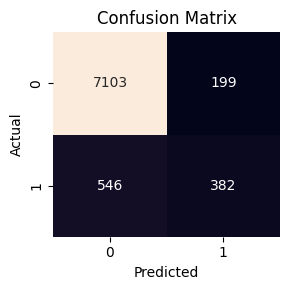

In [37]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualizar matriz de confusión
df_cm = pd.DataFrame(conf_matrix)

plt.figure(figsize=(3, 3))
sns.heatmap(df_cm, annot=True, fmt="d", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.tight_layout()
plt.show()

### Observaciones
>
> - Matriz de Confusión:
>
> - Verdaderos Negativos (TN): 7103
>
> - Falsos Positivos (FP): 546
> 
> - Falsos Negativos (FN): 199
> 
> - Verdaderos Positivos (TP): 382

# Optimización con GridSearchCV

In [38]:
hyperparams = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
               'penalty': ['l1', 'l2', 'elasticnet', None],
               'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

grid = GridSearchCV(LogisticRegression(random_state=42),
                    hyperparams,
                    scoring="accuracy",
                    cv=5)

grid.fit(X_train_norm, y_train)

/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1232: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1232: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1232: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1232: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1232: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1232: U

,estimator,LogisticRegre...ndom_state=42)
,param_grid,"{'C': [0.001, 0.01, ...], 'penalty': ['l1', 'l2', ...], 'solver': ['newton-cg', 'lbfgs', ...]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l1'


In [39]:
grid.best_params_

{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}

In [40]:
best_model_grid = grid.best_estimator_
best_model_grid

,penalty,'l1'
,dual,False
,tol,0.0001
,C,0.1
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


In [41]:
y_pred_grid = best_model_grid.predict(X_train_norm)
grid_accuracy = accuracy_score(y_train, y_pred_grid)
grid_accuracy

0.9089307411907654

# Precisión del modelo base en entrenamiento

In [42]:
y_pred_base_train = model.predict(X_train_norm)
base_accuracy_train = accuracy_score(y_train, y_pred_base_train)
base_accuracy_train

0.9090218712029161

# Precisión del modelo optimizado en entrenamiento

In [43]:
grid_accuracy

0.9089307411907654

# Comparativa


In [44]:
base_accuracy_train, grid_accuracy

(0.9090218712029161, 0.9089307411907654)

# **Resultado:**

El modelo optimizado tiene una precisión ligeramente inferior (0.01% menos) que el modelo base.